# Problem Statement

In this Linear Machine Learning model, We'll work on advertising dataset which consists of all money spend on advertisement and sales earned.

we are going to predict Sales with some indipendent variables from the dataset.

## 1. Importing Libraries and Collecting Data

In [1]:
#  Importing libraries for exploratory Data Analysis

import pandas as pd
import numpy as np

#  Importing libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#  importing Data 
adv = pd.read_csv("advertising.csv")

## 2. Analyzing Data

In [3]:
#Observing Top 5 Rows
adv.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Observing data type and null values for columns
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#Sorting Newspaper column in ascending order
adv.sort_values("Newspaper", axis = 0, ascending = True) 

,TV,Radio,Newspaper,Sales
33,265.6,20.0,0.3,17.4
65,69.0,9.3,0.9,11.3
8,8.6,2.1,1.0,4.8
139,184.9,43.9,1.7,20.7
42,293.6,27.7,1.8,20.7
...,...,...,...,...
118,125.7,36.9,79.2,15.9
165,234.5,3.4,84.8,16.9
75,16.9,43.7,89.4,8.7
101,296.4,36.3,100.9,23.8


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


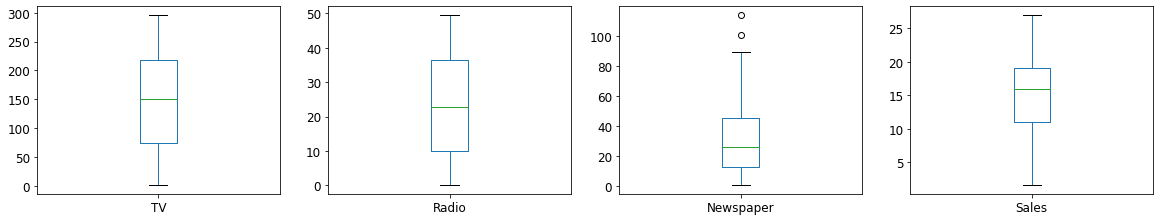

In [7]:
#Plotting Box plot to observe outliers
adv.plot(kind='box', subplots=True, layout=(5,4) ,fontsize=12, figsize=(20,20))
plt.show()

## 3.Data Cleaning

In [8]:
#Removing Outliers

# Collecting 25th Percentile
Q1 = adv.quantile(0.25)

# Collecting 75th Percentile
Q3 = adv.quantile(0.75)

# Collecting IQR
IQR = Q3 - Q1

# Set Lower Limit
lower_limit=Q1-1.5*IQR
# Set Upper Limit
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

for x in adv.iloc[::-1].columns:
    for i in range(len(adv[x])):
        if (adv[x][i]>upper_limit[x]):                          #checking whether data is above upper limit
            print("{} having  {} will be changed".format(x,adv[x][i]))
            adv.replace(adv[x][i],adv[x].mean(),inplace=True)  #modifying data to mean values
        elif (adv[x][i]<lower_limit[x]):                       #checking whether data is below lower limit
            print("{} having {} will be changed".format(x,adv[x][i]))
            adv.replace(adv[x][i],adv[x].mean(),inplace=True)  #modifying data to mean values
adv.describe()

TV          -142.300
Radio        -29.850
Newspaper    -35.775
Sales         -1.075
dtype: float64
TV           435.500
Radio         76.350
Newspaper     93.625
Sales         31.125
dtype: float64
Newspaper having  114.0 will be changed
Newspaper having  100.9 will be changed


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,29.782954,15.130500
std,85.854236,14.846809,20.343388,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,43.550000,19.050000
max,296.400000,49.600000,89.400000,27.000000


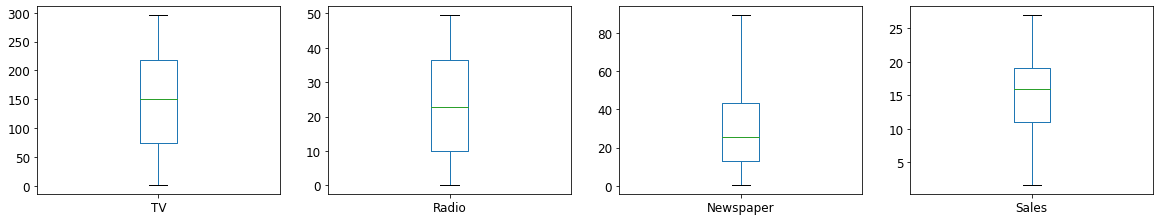

In [9]:
#Checking whether all outliers are replaced
adv.plot(kind='box', subplots=True, layout=(5,4) ,fontsize=12, figsize=(20,20))
plt.show()

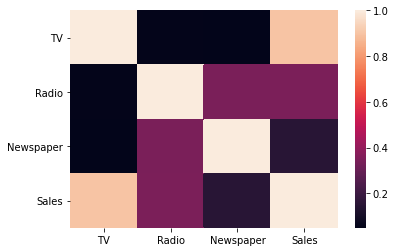

In [10]:
#Observing Correlation with Heatmap
sb.heatmap(adv.corr())

In [11]:
#Observing Correlation
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.049261,0.901208
Radio,0.054809,1.000000,0.345223,0.349631
Newspaper,0.049261,0.345223,1.000000,0.150686
Sales,0.901208,0.349631,0.150686,1.000000


## 4.Train Data and Test Data

In [12]:
#Selecting data for Training and Testing
X = adv.loc[:,["TV","Radio"]]
y = adv.Sales

In [13]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [14]:
#Splitting Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.15,random_state=14)

In [15]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (170, 2)
X_test shape (30, 2)
y_train shape (170,)
y_test shape (30,)


In [16]:
# Importing machine learning algorithm
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_predict = model.predict(X_test)

In [20]:
X_test.head(5)

,TV,Radio
114,78.2,46.8
189,18.7,12.1
198,283.6,42.0
151,121.0,8.4
5,8.7,48.9


In [21]:
pd.DataFrame([list(y_predict),list(y_test)]) #Compairing predicted value and actual value

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,13.947441,7.102106,24.383429,12.161107,10.466673,21.025343,9.478202,20.287534,11.190565,15.817044,...,7.321292,8.960507,12.31304,9.359643,17.975793,18.805889,14.71909,18.778595,10.535638,7.886691
1,14.600000,6.700000,25.500000,11.600000,7.200000,22.300000,9.700000,22.400000,10.700000,17.100000,...,7.200000,12.600000,12.50000,6.600000,16.600000,17.400000,16.70000,20.500000,10.900000,8.100000


## 5. Accuracy Check

In [22]:
# Model evaluation 
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [23]:
# r2 gives accuracy of the model
r2_score(y_test,y_predict)*100

93.25402947394139

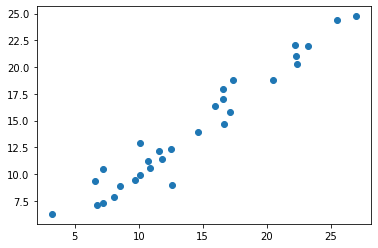

In [24]:
plt.scatter(y_test,y_predict)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 1.2129086444484338
MSE: 2.578252969086269
RMSE: 1.605693921358074


## 6. Taking Values from user and Predicting Sales

In [26]:
#Taking Values
a=input("Enter Investment in advertising on TV = ")
b=input("Enter Investment in advertising on Radio = ")
c=input("Enter Investment in advertising on Newspaper = ")

Enter Investment in advertising on TV = 250
Enter Investment in advertising on Radio = 150
Enter Investment in advertising on Newspaper = 50


In [27]:
#Predicting Sales
y_predict = model.predict(pd.DataFrame({'TV':[a], 'Radio':[b]}))

In [28]:
y_predict

array([34.03113047])

In [29]:
print("Sales will increase by : {:.2f}% ".format(y_predict[0]))

Sales will increase by : 34.03% 
